# Part1 : Content Based -  Item Similarity EDA

In [1]:
import numpy as np
import pandas as pd

In [29]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names= column_names)

In [30]:
df.head(2) # item id represents the movie titles

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949


In [31]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [32]:
movie_titles.head(2) # these are the title of the movie

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)


In [33]:
movie = pd.merge(df,movie_titles, on='item_id' )

In [34]:
movie.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# 2. visualization

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
%matplotlib inline

In [36]:
# group by title and grab rating and ger average of rating
movie.groupby('title')['rating'].mean()

title
'Til There Was You (1997)                                   2.333333
1-900 (1994)                                                2.600000
101 Dalmatians (1996)                                       2.908257
12 Angry Men (1957)                                         4.344000
187 (1997)                                                  3.024390
2 Days in the Valley (1996)                                 3.225806
20,000 Leagues Under the Sea (1954)                         3.500000
2001: A Space Odyssey (1968)                                3.969112
3 Ninjas: High Noon At Mega Mountain (1998)                 1.000000
39 Steps, The (1935)                                        4.050847
8 1/2 (1963)                                                3.815789
8 Heads in a Duffel Bag (1997)                              3.250000
8 Seconds (1994)                                            3.750000
A Chef in Love (1996)                                       4.125000
Above the Rim (1994)        

In [37]:
# lets sort by descending and grab the head of it
movie.groupby('title')['rating'].mean().sort_values(ascending= False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [38]:
# lets count instead on average rating
movie.groupby('title')['rating'].count().sort_values(ascending= False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [39]:
ratings = pd.DataFrame(movie.groupby('title')['rating'].mean())

In [41]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [42]:
ratings['rating#'] = pd.DataFrame(movie.groupby('title')['rating'].count())

In [43]:
ratings.head(2)

,rating,rating#
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5


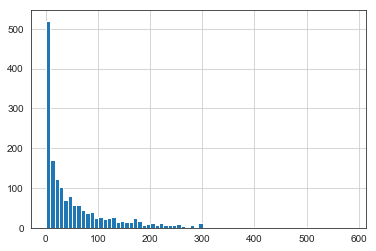

In [44]:
ratings['rating#'].hist(bins=70)

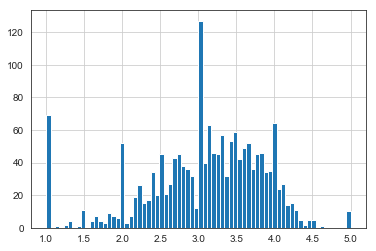

In [46]:
ratings['rating'].hist(bins=70)

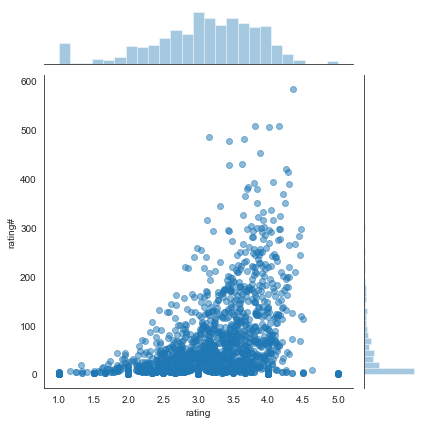

In [47]:
sns.jointplot(x='rating',y='rating#', data= ratings, alpha=0.5)

# Part2 : Build Recommendation 

In [50]:
movie.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [51]:
moviemat = movie.pivot_table(index='user_id', columns='title', values='rating')

In [54]:
moviemat.head(2) # As we can see there are lots of null values that
# people havent watch those movies

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN


In [56]:
# Check most rating movies
ratings.sort_values('rating#', ascending= False).head(10)

,rating,rating#
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [ ]:
# We chose two movies Stars Wars and Liar Liar

In [57]:
# Grab user rating for those two mivies
starwars_user_ratings =  moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [58]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [59]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

C:\Users\prati\Python\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\prati\Python\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [60]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

C:\Users\prati\Python\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\prati\Python\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [61]:
# clean all the null values

In [62]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [63]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [64]:
# some time there is no sense correlation so You can set the threshold for
# rating

In [65]:
corr_starwars = corr_starwars.join(ratings['rating#'])

In [66]:
corr_starwars.head()

,Correlation,rating#
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [67]:
corr_starwars[corr_starwars['rating#']>100].sort_values('Correlation',
                                                       ascending=False).head()

,Correlation,rating#
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [68]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])

In [69]:
corr_liarliar.dropna(inplace=True)

In [70]:
corr_liarliar=corr_liarliar.join(ratings['rating#'])

In [74]:
corr_liarliar[corr_liarliar['rating#']>20].sort_values(
'Correlation', ascending= False).head()

,Correlation,rating#
title,,
Liar Liar (1997),1.000000,485
Deceiver (1997),0.851467,29
My Man Godfrey (1936),0.700794,27
"Prophecy, The (1995)",0.685905,32
Bio-Dome (1996),0.680800,31
